### Pós-graduação em Ciência de Dados e Machine Learning

#### Módulo 3 - Data Mining e Machine Learning

#### Disciplina: **Big Data com MapReduce - Spark **

#### Turma: **A**

#### Projeto Final para disciplina Big Data com MapReduce - Spark 
  
#### Nome do Integrante: Matheus Maia Holanda Lopes   RA: 51900697

# Explicação do projeto final da disciplina


A respostas são individuais ou por dupla.

Escolha 10 questões desta avaliação final da disciplina.

Considere que algumas questões possuem pontuação equivalente a duas questões: questão 5, questão 6 e questão 7. Portanto se você escolhe as questões de 1 a 7 terá a pontuação de 10 questões.

# Projeto Machine Learning com SPARK

### Questão 1) Descrição do Problema

Descreva o problema que deseja resolver com Spark e machine learning

Tratem de algum problema não visto no curso e seria ideal se fosse algum problema envolvendo caso prático.

Exemplo para obter datasets sklearn, http://archive.ics.uci.edu/ml/index.php, https://www.kaggle.com/, https://www.tse.jus.br/hotsites/pesquisas-eleitorais/index.htmlhttp://www.dados.gov.br/

#### Resposta
Com a evolução do mercado dos bitcoins e seu crescimento em termos de investimento e valorização. Esse trabalho visa pegar um dataset contendo dados relacionados ao rendimento e fatores financeiros relacionados ao mercado de bitcoins e fazer uma análise e projeção desses valores utilizando o Spark como forma de processar com maior rapidez essa quantidade de dados, aplicando o algoritmo de regressão linear para predição de valores da moeda.

#### Colunas
Timestamp -> Data (Epoch Unix format) da coleção dos dados; Esta coluna sofrerá uma transformação para o melhor entendimento da data de acordo com parâmetros conhecidos; Intervalos de aproximadamente 1 em 1 minute, com o fuso horário UTC.

Open -> Valor inicial em USD de acordo com o alcance de medição.

High -> Valor máximo alcançado durante o intervalo de medição, em USD.

Low -> Menor valor alcançado durante o intervalo de medição, em USD.

Close -> Valor de fechamento durante o intervalo de medição, em USD.

Volume_ (BTC) -> Volume, em BTC, trocado no Bitstamp durante o intervalo de medição.

Volume_ (Currency) -> Volume, em USD, trocado no Bitstamp durante o intervalo de medição.

Weighted_Price -> Média de preço em determinado alcance, em USD; Calculado baseado no volume das trocas feitas; Na análise, pode ser considerado como o valor médio.

### Questão 2) Algoritmo

Qual o motivo da escolha do algoritmo para resolver este problema ?

#### Resposta
Devido ao fato de que as features presentes no dataset apresentam forte correlação entre si, o uso de um modelo de regressão linear é justificável, utilizando o modelo Elastic-net que apresenta historicamente bons resultados com esse tipo de análise.
https://scikit-learn.org/stable/modules/linear_model.html#elastic-net

### Questão 3) Dataset

Leia o dataset

Caso seja de um arquivo envie o dataset junto com este notebook. 

#### Resposta


In [1]:
#importando bibliotecas auxiliares para análise no PySpark
import numpy as np 
import pandas as pd 

In [2]:
#instalando pyspark
!pip install pyspark

In [3]:
#importando bibliotecas que serão utilizadas do pyspark
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, SQLContext
from pyspark.sql.types import *
from pyspark.sql.functions import *

from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import StringIndexer

from pyspark.ml.regression import LinearRegression
from pyspark.mllib.evaluation import RegressionMetrics
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import StringIndexer
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator, CrossValidatorModel
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.evaluation import RegressionEvaluator

In [4]:
#configurando o sistema para visualizações
import seaborn as sns
import matplotlib.pyplot as plt
#visualização
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', 400)

from matplotlib import rcParams
sns.set(context='notebook', style='whitegrid', rc={'figure.figsize': (18,4)})
rcParams['figure.figsize'] = 18,4

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
# definindo seeds aleatórias para reprodução do notebook
rnd_seed=23
np.random.seed=rnd_seed
np.random.set_state=rnd_seed

In [6]:
#biblioteca instalada para corrigir erro encontrado na hora de executar o Spark
!pip install findspark

In [7]:
#Importando findspark
import findspark
findspark.init() 

In [8]:
#Criando contexto Spark com o nome de Bitcoin
sc = SparkContext(appName = "Bitcoin")
spark = SparkSession.Builder().getOrCreate()

In [9]:
spark

In [10]:
#Contexto sql
sqlContexto = SQLContext(spark.sparkContext)
sqlContexto

In [11]:
#Carregando dataset
bitcoin = sqlContexto.read.csv('bitstampUSD.csv', header='true', inferSchema='true')

In [12]:
#Lendo o dataset
bitcoin.show()

+----------+----+----+----+-----+------------+-----------------+--------------+
| Timestamp|Open|High| Low|Close|Volume_(BTC)|Volume_(Currency)|Weighted_Price|
+----------+----+----+----+-----+------------+-----------------+--------------+
|1325317920|4.39|4.39|4.39| 4.39|  0.45558087|     2.0000000193|          4.39|
|1325317980| NaN| NaN| NaN|  NaN|         NaN|              NaN|           NaN|
|1325318040| NaN| NaN| NaN|  NaN|         NaN|              NaN|           NaN|
|1325318100| NaN| NaN| NaN|  NaN|         NaN|              NaN|           NaN|
|1325318160| NaN| NaN| NaN|  NaN|         NaN|              NaN|           NaN|
|1325318220| NaN| NaN| NaN|  NaN|         NaN|              NaN|           NaN|
|1325318280| NaN| NaN| NaN|  NaN|         NaN|              NaN|           NaN|
|1325318340| NaN| NaN| NaN|  NaN|         NaN|              NaN|           NaN|
|1325318400| NaN| NaN| NaN|  NaN|         NaN|              NaN|           NaN|
|1325318460| NaN| NaN| NaN|  NaN|       

In [13]:
#Mostrando o schema do dataframe
bitcoin.printSchema()

root
 |-- Timestamp: integer (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume_(BTC): double (nullable = true)
 |-- Volume_(Currency): double (nullable = true)
 |-- Weighted_Price: double (nullable = true)



### Questão 4) Tratamento dos dados

#### Resposta

In [17]:
#número total de linhas no dataframe
bitcoin.count()
#número total de colunas
len(bitcoin.columns)

4572257

8

In [19]:
#criando uma tabela de visualização do temp
bitcoin.createOrReplaceTempView('bitstampUSD') 
bitstampUSD = sqlContexto.sql("select *,from_unixtime(Timestamp) as `dateTime` from bitstampUSD")
#removendo valores nulos presentes no dataframe
bitstampUSD=bitstampUSD.dropna('any')

In [20]:
bitstampUSD.show()
#Número total de linhas após remoção dos valores nulos
bitstampUSD.count()

+----------+----+----+----+-----+------------+-----------------+--------------+-------------------+
| Timestamp|Open|High| Low|Close|Volume_(BTC)|Volume_(Currency)|Weighted_Price|           dateTime|
+----------+----+----+----+-----+------------+-----------------+--------------+-------------------+
|1325317920|4.39|4.39|4.39| 4.39|  0.45558087|     2.0000000193|          4.39|2011-12-31 05:52:00|
|1325346600|4.39|4.39|4.39| 4.39|        48.0|           210.72|          4.39|2011-12-31 13:50:00|
|1325350740| 4.5|4.57| 4.5| 4.57| 37.86229723|     171.38033753|  4.5264114983|2011-12-31 14:59:00|
|1325350800|4.58|4.58|4.58| 4.58|         9.0|            41.22|          4.58|2011-12-31 15:00:00|
|1325391360|4.58|4.58|4.58| 4.58|       1.502|          6.87916|          4.58|2012-01-01 02:16:00|
|1325431680|4.84|4.84|4.84| 4.84|        10.0|             48.4|          4.84|2012-01-01 13:28:00|
|1325457900| 5.0| 5.0| 5.0|  5.0|        10.1|             50.5|           5.0|2012-01-01 20:45:00|


3330541

In [21]:
#Renomeando algumas colunas para facilitar a escrita e representação no codigo 
bitstampUSD=bitstampUSD.withColumnRenamed("Volume_(BTC)", "VolBTC").withColumnRenamed("Volume_(Currency)", "VolCurrency")

In [22]:
#Criando outro dataframe para fazer a divisão e representação dos dados de acordo com o Tempo
DateTime_df= bitstampUSD
DateTime_df.show()

+----------+----+----+----+-----+-----------+------------+--------------+-------------------+
| Timestamp|Open|High| Low|Close|     VolBTC| VolCurrency|Weighted_Price|           dateTime|
+----------+----+----+----+-----+-----------+------------+--------------+-------------------+
|1325317920|4.39|4.39|4.39| 4.39| 0.45558087|2.0000000193|          4.39|2011-12-31 05:52:00|
|1325346600|4.39|4.39|4.39| 4.39|       48.0|      210.72|          4.39|2011-12-31 13:50:00|
|1325350740| 4.5|4.57| 4.5| 4.57|37.86229723|171.38033753|  4.5264114983|2011-12-31 14:59:00|
|1325350800|4.58|4.58|4.58| 4.58|        9.0|       41.22|          4.58|2011-12-31 15:00:00|
|1325391360|4.58|4.58|4.58| 4.58|      1.502|     6.87916|          4.58|2012-01-01 02:16:00|
|1325431680|4.84|4.84|4.84| 4.84|       10.0|        48.4|          4.84|2012-01-01 13:28:00|
|1325457900| 5.0| 5.0| 5.0|  5.0|       10.1|        50.5|           5.0|2012-01-01 20:45:00|
|1325534640| 5.0| 5.0| 5.0|  5.0|     19.048|       95.24|  

In [23]:
#Fazendo um split do dataset de acordo com as colunas necessárias para análise temporal
splitDF = DateTime_df.withColumn("data",split(col("dateTime")," ").getItem(0))
splitDF = splitDF.withColumn("tempo",split(col("dateTime")," ").getItem(1))
splitDF.printSchema()
splitDF.show()

root
 |-- Timestamp: integer (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- VolBTC: double (nullable = true)
 |-- VolCurrency: double (nullable = true)
 |-- Weighted_Price: double (nullable = true)
 |-- dateTime: string (nullable = true)
 |-- data: string (nullable = true)
 |-- tempo: string (nullable = true)

+----------+----+----+----+-----+-----------+------------+--------------+-------------------+----------+--------+
| Timestamp|Open|High| Low|Close|     VolBTC| VolCurrency|Weighted_Price|           dateTime|      data|   tempo|
+----------+----+----+----+-----+-----------+------------+--------------+-------------------+----------+--------+
|1325317920|4.39|4.39|4.39| 4.39| 0.45558087|2.0000000193|          4.39|2011-12-31 05:52:00|2011-12-31|05:52:00|
|1325346600|4.39|4.39|4.39| 4.39|       48.0|      210.72|          4.39|2011-12-31 13:50:00|2011-12-31|13:50:00

In [24]:
#Adicionando coluna hora no dataset
splitDFHour = splitDF.withColumn("hora",split(col("tempo"),":").getItem(0))
splitDFHour.printSchema()
splitDFHour.show()

root
 |-- Timestamp: integer (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- VolBTC: double (nullable = true)
 |-- VolCurrency: double (nullable = true)
 |-- Weighted_Price: double (nullable = true)
 |-- dateTime: string (nullable = true)
 |-- data: string (nullable = true)
 |-- tempo: string (nullable = true)
 |-- hora: string (nullable = true)

+----------+----+----+----+-----+-----------+------------+--------------+-------------------+----------+--------+----+
| Timestamp|Open|High| Low|Close|     VolBTC| VolCurrency|Weighted_Price|           dateTime|      data|   tempo|hora|
+----------+----+----+----+-----+-----------+------------+--------------+-------------------+----------+--------+----+
|1325317920|4.39|4.39|4.39| 4.39| 0.45558087|2.0000000193|          4.39|2011-12-31 05:52:00|2011-12-31|05:52:00|  05|
|1325346600|4.39|4.39|4.39| 4.39|       48.0|      210.7

In [26]:
#Organizando Dataframe com as colunas data, tempo e dia_da_semana
splitDFHour= splitDFHour.withColumn("data",splitDFHour["data"].cast(DateType())).withColumn("hora",splitDFHour["hora"].cast(DoubleType())).withColumn("dateTime",splitDFHour["dateTime"].cast(DateType()))
splitDFHour=splitDFHour.withColumn('dia_da_semana',dayofweek(splitDFHour.data))
splitDFHour.printSchema()

root
 |-- Timestamp: integer (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- VolBTC: double (nullable = true)
 |-- VolCurrency: double (nullable = true)
 |-- Weighted_Price: double (nullable = true)
 |-- dateTime: date (nullable = true)
 |-- data: date (nullable = true)
 |-- tempo: string (nullable = true)
 |-- hora: double (nullable = true)
 |-- dia_da_semana: integer (nullable = true)



In [27]:
#Organizando Dataframe com colunas data, tempo e year
splitDFWithYear = splitDFHour.withColumn("ano",split(col("data"),"-").getItem(0))
splitDFWithYear.show()

+----------+----+----+----+-----+-----------+------------+--------------+----------+----------+--------+----+-------------+----+
| Timestamp|Open|High| Low|Close|     VolBTC| VolCurrency|Weighted_Price|  dateTime|      data|   tempo|hora|dia_da_semana| ano|
+----------+----+----+----+-----+-----------+------------+--------------+----------+----------+--------+----+-------------+----+
|1325317920|4.39|4.39|4.39| 4.39| 0.45558087|2.0000000193|          4.39|2011-12-31|2011-12-31|05:52:00| 5.0|            7|2011|
|1325346600|4.39|4.39|4.39| 4.39|       48.0|      210.72|          4.39|2011-12-31|2011-12-31|13:50:00|13.0|            7|2011|
|1325350740| 4.5|4.57| 4.5| 4.57|37.86229723|171.38033753|  4.5264114983|2011-12-31|2011-12-31|14:59:00|14.0|            7|2011|
|1325350800|4.58|4.58|4.58| 4.58|        9.0|       41.22|          4.58|2011-12-31|2011-12-31|15:00:00|15.0|            7|2011|
|1325391360|4.58|4.58|4.58| 4.58|      1.502|     6.87916|          4.58|2012-01-01|2012-01-01|02

### Usando Vector assembler
Após remoção de valores nulos, pela natureza dos dados é necessário realizar uma normalização para diminuir a proporção entre os valores máximos e mínimos

In [28]:
# Colocar as features em uma coluna no formato de vetor com cada feature
assembler = VectorAssembler(inputCols=['Open','High', 'VolBTC', 'VolCurrency','Weighted_Price'], outputCol="features")
assembled_df = assembler.transform(bitstampUSD)
assembled_df.show(10, truncate= False)

+----------+----+----+----+-----+-----------+------------+--------------+-------------------+------------------------------------------------+
|Timestamp |Open|High|Low |Close|VolBTC     |VolCurrency |Weighted_Price|dateTime           |features                                        |
+----------+----+----+----+-----+-----------+------------+--------------+-------------------+------------------------------------------------+
|1325317920|4.39|4.39|4.39|4.39 |0.45558087 |2.0000000193|4.39          |2011-12-31 05:52:00|[4.39,4.39,0.45558087,2.0000000193,4.39]        |
|1325346600|4.39|4.39|4.39|4.39 |48.0       |210.72      |4.39          |2011-12-31 13:50:00|[4.39,4.39,48.0,210.72,4.39]                    |
|1325350740|4.5 |4.57|4.5 |4.57 |37.86229723|171.38033753|4.5264114983  |2011-12-31 14:59:00|[4.5,4.57,37.86229723,171.38033753,4.5264114983]|
|1325350800|4.58|4.58|4.58|4.58 |9.0        |41.22       |4.58          |2011-12-31 15:00:00|[4.58,4.58,9.0,41.22,4.58]                      |

### Normalização
Usando o Min_Max_Scaler para escalonar os dados. As colunas de entradas são as features, e a coluna de saída após a normalização ficará contida na coluna "scaled_features"

In [29]:
# Inicializando o `Min_Max_scaler`
Min_Max_scaler = MinMaxScaler(inputCol="features", outputCol="scaled_features")
# Inserindo o dataframe no scaler
scaled_df= Min_Max_scaler.fit(assembled_df).transform(assembled_df)
# Analisando o resultado gerado
scaled_df.select("features", "scaled_features").show(10, truncate=False)
scaled_df.columns

+------------------------------------------------+------------------------------------------------------------------------------------------------------------+
|features                                        |scaled_features                                                                                             |
+------------------------------------------------+------------------------------------------------------------------------------------------------------------+
|[4.39,4.39,0.45558087,2.0000000193,4.39]        |[3.000718137967933E-5,3.0006815107159923E-5,7.782582427582654E-5,1.914610718240324E-7,3.001093788611932E-5] |
|[4.39,4.39,48.0,210.72,4.39]                    |[3.000718137967933E-5,3.0006815107159923E-5,0.008199728766573702,2.0172338332716992E-5,3.001093788611932E-5]|
|[4.5,4.57,37.86229723,171.38033753,4.5264114983]|[3.560174061995855E-5,3.916143666527654E-5,0.006467928495112392,1.6406331398208024E-5,3.6949644669905385E-5]|
|[4.58,4.58,9.0,41.22,4.58]             

['Timestamp',
 'Open',
 'High',
 'Low',
 'Close',
 'VolBTC',
 'VolCurrency',
 'Weighted_Price',
 'dateTime',
 'features',
 'scaled_features']

### Questão 5) Treinamento

Mostre como foi feito treinamento

#### Resposta

In [30]:
# Dividindo os dados em treino, teste e validação
train_data, test_data = scaled_df.randomSplit([.7,.3], seed=rnd_seed)

### Modelo de Regressão Linear
Agora é criado o modelo ElasticNet de Regressão Linear que possui dois coeficientes de regularização l1 e l2. 

In [31]:
# Inicializando o modelo
lr = (LinearRegression(featuresCol='scaled_features' , labelCol="Weighted_Price", predictionCol='Predicted_price', 
                               maxIter=100, regParam=0.3, elasticNetParam=0.8, standardization=False))

In [32]:
# Realizando o treinamento
ModeloLinear = lr.fit(train_data)

### Questão 6) Previsão

mostre um exemplo de previsão

#### Resposta

In [33]:
# Gerando predições
predictions = ModeloLinear.transform(test_data)
# Armazenando e demonstrando os valores das predições
pred_dados= predictions.select("Predicted_price", "Weighted_Price").show(10)

+-----------------+--------------+
|  Predicted_price|Weighted_Price|
+-----------------+--------------+
|6.124589751623458|          4.39|
|  6.3144629058018|          4.58|
|6.734182509774975|           5.0|
|7.053968874706918|          5.32|
|7.023988902994549|          5.29|
|7.023988902994549|          5.29|
|6.924055663953316|          5.19|
|7.097425169066653|  5.3604618117|
|7.506011043116942|   5.777027027|
|7.733514900187298|           6.0|
+-----------------+--------------+
only showing top 10 rows



### Questão 7) Avalie os resultados

Exiba precisão, acurácia, f1 score, recall

Faça considerações sobre os resultados

#### Resposta

In [34]:
# Selecionando (predicted_price, Weighted_price) e computando o erro
avaliador = RegressionEvaluator(
    labelCol="Weighted_Price", predictionCol="Predicted_price", metricName="rmse")
rmse = avaliador.evaluate(predictions)
print("Root Mean Squared Error (RMSE) nos dados de teste = %g" % rmse)

Root Mean Squared Error (RMSE) nos dados de teste = 3.46507


Text(0.5, 1.0, 'Erro de Treinamento Log vs. Iterações')

Text(0.5, 0, 'Erro de Treinamento Log')

Text(0, 0.5, 'Iterações')

MAE: 2.3194057942144104


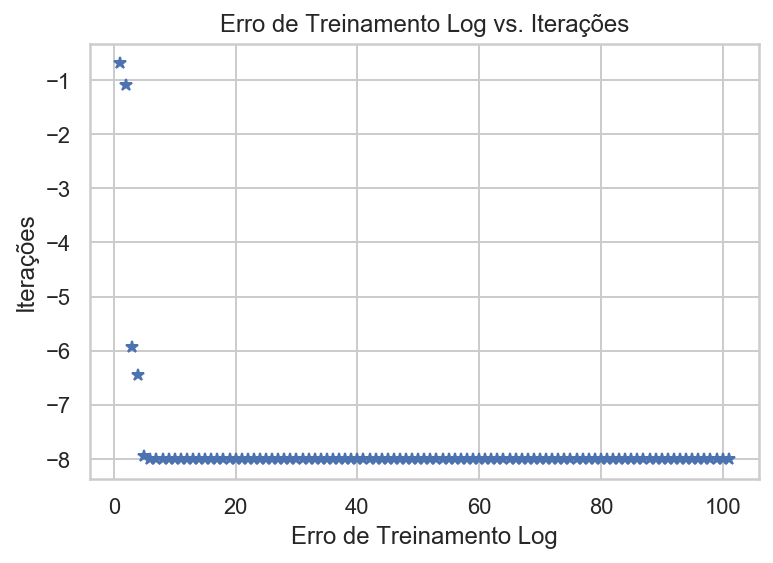

In [37]:
#O gráfico mostra o logaritmo do erro do sistema nas 10 iterações.

iterations = list(range(1,ModeloLinear.summary.totalIterations + 1))
perdas = np.log(ModeloLinear.summary.objectiveHistory)
plt.plot(iterations,perdas,'*')
plt.title('Erro de Treinamento Log vs. Iterações')
plt.xlabel('Erro de Treinamento Log')
plt.ylabel('Iterações')
# Intercept do modelo
print("MAE: {0}".format(ModeloLinear.summary.meanAbsoluteError))

In [38]:
#Usando esse modelo para predição dos dados de teste. Calculando Root Mean Square Error do modelo.
predictionsTest = ModeloLinear.transform(test_data)
predictionsTest.select("Predicted_price", "Weighted_Price").show(10)

rmse = avaliador.evaluate(predictionsTest)
print("Root Mean Squared Error (RMSE) nos dados de teste = %g" % rmse)

+-----------------+--------------+
|  Predicted_price|Weighted_Price|
+-----------------+--------------+
|6.124589751623458|          4.39|
|  6.3144629058018|          4.58|
|6.734182509774975|           5.0|
|7.053968874706918|          5.32|
|7.023988902994549|          5.29|
|7.023988902994549|          5.29|
|6.924055663953316|          5.19|
|7.097425169066653|  5.3604618117|
|7.506011043116942|   5.777027027|
|7.733514900187298|           6.0|
+-----------------+--------------+
only showing top 10 rows

Root Mean Squared Error (RMSE) nos dados de teste = 3.46507


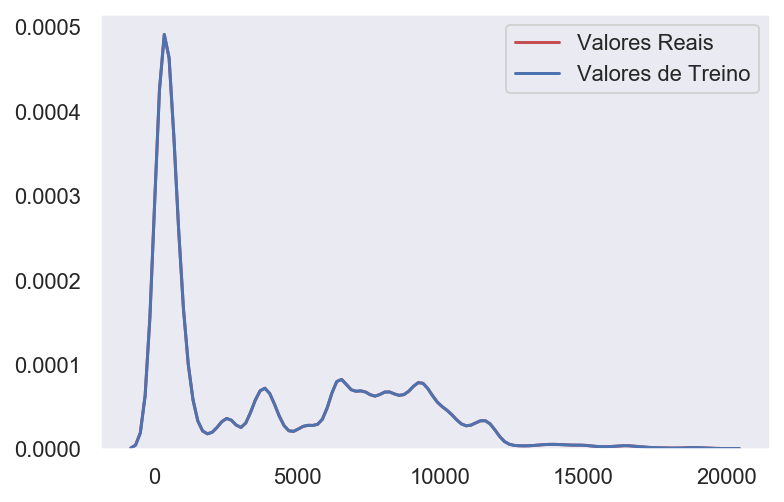

In [40]:
# Usando o método "predict" para predizer uma saída dos features polinominais,
# para então usar a função "DistributionPlot" para mostrar a distribuição do Predicted_Price vs Weighted_Price dos dados de teste

pred_resultados=ModeloLinear.evaluate(test_data)
Y = pred_resultados.predictions.select('Weighted_Price').toPandas()
_Y = pred_resultados.predictions.select("Predicted_price").toPandas()
sns.set_style("dark")
ax1= sns.distplot(Y, hist=False, color="r", label="Valores Reais")
sns.distplot(_Y, hist=False, color="b", label="Valores de Treino" , ax=ax1)

<Figure size 864x504 with 0 Axes>

Text(0.5, 1.0, 'BitCoin Weighted Prediction')

Text(0.5, 0, 'Weighted_Price')

Text(0, 0.5, 'Predicted_price')

C:\Users\MatheusPc\Documents\Anaconda\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\MatheusPc\Documents\Anaconda\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


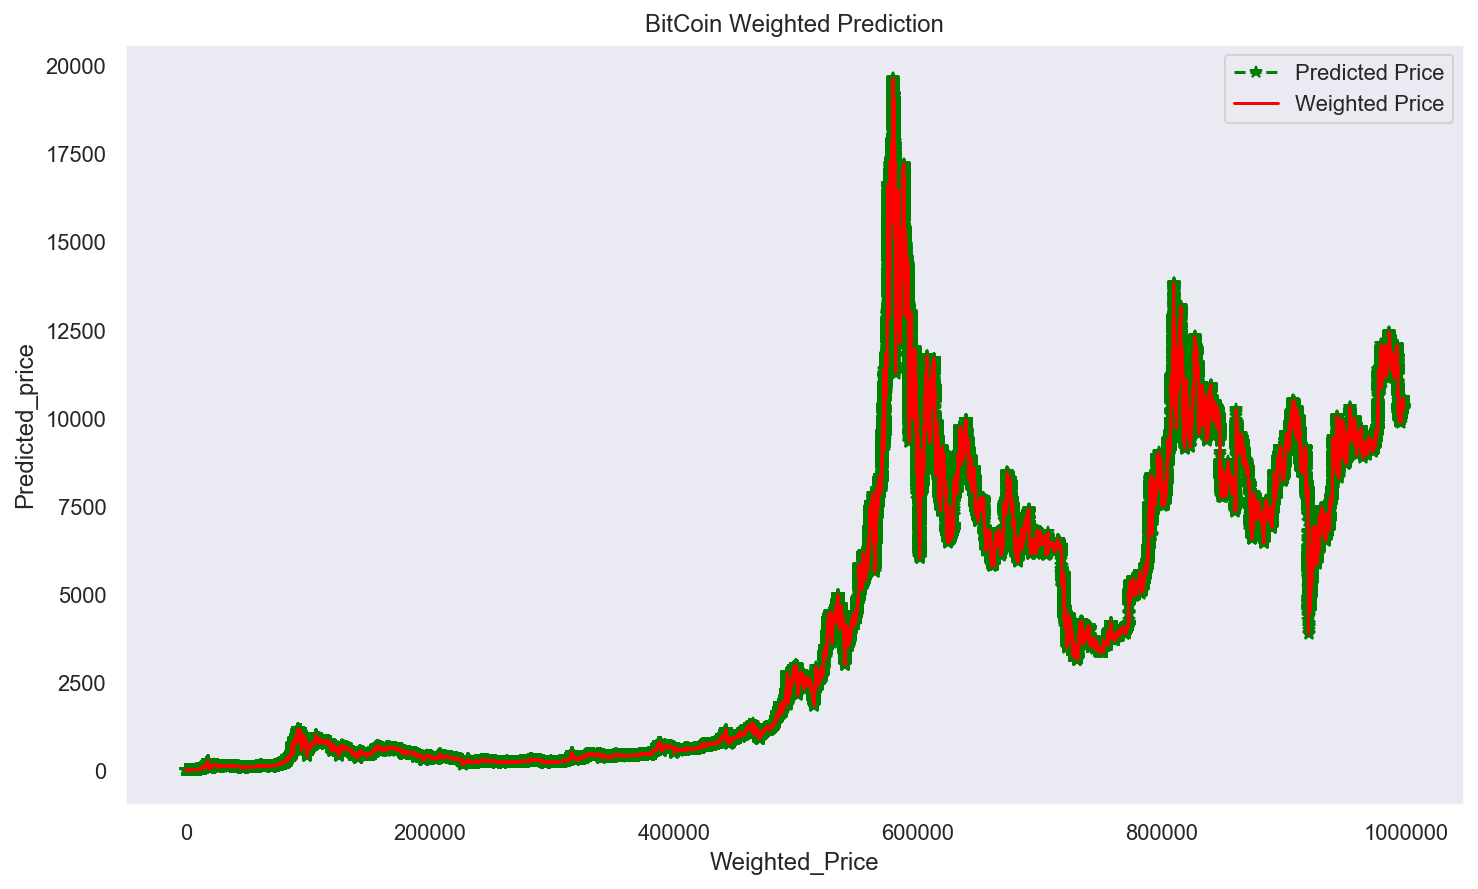

In [41]:
#Plotando Weighted_price vs Predicted_price usando Matplotlib
plt.figure(figsize=(12,7))
plt.plot(Y, color='green', marker='*', linestyle='dashed', 
         label='Predicted Price')
plt.plot(_Y, color='red', label='Weighted Price')
plt.title('BitCoin Weighted Prediction')
plt.xlabel('Weighted_Price')
plt.ylabel('Predicted_price')
plt.legend()

In [42]:
#Finalizando o spark
spark.stop()

# Questões teóricas

###  Questão 8) Porque map reduce do hadoop não é adequado para aplicar nos algoritmos de aprendizagem de máquina ?

#### Resposta
Além da questão da demora no processamento, o MapReduce do Hadoop não possui nenhuma biblioteca que contém funcionalidade e algoritmos de aprendizado de máquina, necessitando o uso de terceiros. 

### Questão 9) Qual a diferença fundamental entre transformação e ações no spark ?

#### Resposta

As transformações são responsáveis por transformar um RDD em outro RDD como, por exemplo, filtros e mapeamentos. Já as ações são operações para manipular diretamente os dados como, por exemplo, realizar algum cálculo com os valores do RDD ou salvar os dados em um arquivo.

### Questão 10) Qual a vantagem de uma arquitetura com spark e hdfs ? 

#### Resposta
Como o Spark não conta com o seu próprio sistema de gerenciamento de arquivos, precisa ser integrado a um. Uma das suas características mais marcantes do HDFS é o fato de permitir que as aplicações trabalhem com milhares de nós em cluster.
Portanto, unindo a velocidade de processamento do Spark que é superior ao MapReduce, juntamente com o armazenamento de um número elevado arquivos no formato HDFS pelo HADOOP, isso melhora a eficiência e amrmazenamento do sitema ao integrar ambas as tecnologias. Mas por ter sido projetado para o Hadoop, muitos concordam que ambos funcionam melhor juntos.

### Questão 11) Qual a vantagem em utilizar um cluster spark ?

#### Resposta
O Spark permite que aplicações em clusters Hadoop executem até 100 vezes mais rápido em memória e até 10 vezes mais rápido em disco, desenvolver rapidamente aplicações em Java, Scala ou Python. Além disso, vem com um conjunto integrado de mais de 80 operadores de alto nível e pode ser usado de forma interativa para consultar dados diretamente do console.

### Questão 12) Quais dos produtos do hadoop o spark mostra uma grande melhora ? 

#### Resposta
O Spark acaba superando o MapReduce do Hadoop, devido ao seu processamento na memória, até 100 vezes para dados na RAM e até 10 vezes para dados armazenados. Os RDDs (Distributed Datasets) resilientes do Spark permitem várias operações de mapa na memória, enquanto o Hadoop MapReduce tem que gravar resultados provisórios em um disco.

### Questão 13) Qual o problema ao aplicar machine learning em bigdata que faz com que spark ganhe tanto destaque ?

#### Resposta
O Spark possui MLlib — uma biblioteca de aprendizado de máquina integrada, enquanto o Hadoop precisa de um terceiro para fornecê-lo. O MLlib possui algoritmos prontos que também são executados na memória. E pelo fato de esses algoritmos de Big Data serem executados diretamente na memória, isso aumenta a velocidade de processamento.

### Questão 14) Cite um exemplo de um problema que não envolva machine learning que você detecta que spark poderia auxiliar ?

#### Resposta
Integração de dados e ETL: varejistas, que precisam olhar os dados de vendas regularmente, ou operadoras de saúde procurando por um quadro preciso de seu uso. O ETL pode combinar e exibir dados de transações de um data warehouse ou outro banco de dados, de modo que eles estejam sempre prontos para analistas de negócios os visualizarem em um formato compreensível.

### Questão 15) Comente sobre a finalidade cada uma das bibliotecas do Spark: SQL and DataFrames, Spark Streaming, MLlib (machine learning) e GraphX (graph) ?

#### Resposta
SQL and DataFrames: É um módulo para processamento de dados estruturados, para execução de queries SQL. Essa biblioteca combina os benefícios dos RDDs com as vantagens proporcionadas do SQL Spark, para processamento de dataframes;

Spark Streamming: Essa biblioteca permite um processamento escalável, high-troughput, tolerante a falhas de dados ao vivo de streams. Essa funcionalidade permite uma contínua função de stream dos dados, através dos chamados DStreams.

MLib: biblioteca de machine learning, que tem como objetivo tornar aplicação desses algortimos escalável e fácil. Oferecendo opções de algoritmos de classificação, regressão, clusterização e filtragem colaborativa. Além de funcionalidades como extração de features, transformações, reduções de dimensionalidade e seleção, como também utilização de pipelines, funções de persitência para carregamento e armazenamento de algoritmos, modelos e pipelines. Também utilizado para análises estatísticas como algebra linear, estatística, gestão dos dados.

GraphX: Biblioteca utilizada para funções de ETL, análise exploratória, e computação gráfica interativa com o sistema. O GraphX reutiliza o conceito do Spark RDD, simplifica as tarefas de análise de gráficos, fornece a capacidade de realizar operações em Grafos direcionados e com propriedades anexadas a cada vértice e aresta.

### Questão 16) O que são RDD ?

#### Resposta
 Resilient Distributed Dataset (RDD), é uma coleção de elementos parcionados através de nós de um cluster que pode ser operacinalizado em paralelo, resilientes do Spark permitem várias operações de mapa na memória.